<a href="https://colab.research.google.com/github/okana2ki/intro-to-DS/blob/main/DS13_2v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#データのランキング

ランキングとは、順位付けです。たとえば、宮崎は餃子への支出額が一位とか、そういうやつです。

In [ ]:
import pandas as pd

file_name = "/content/SSDSE-C-2023.csv"
df = pd.read_csv(file_name, header=[0,1], encoding="shift_jis") # データの読み込み
print(df)

In [ ]:
# 数値データ列だけを対象に(numeric_only=True)、列ごとに降順でランキング
df_rank = df.rank(numeric_only=True, ascending=False)
print(df_rank)

In [ ]:
df_city = df[[('City','市')]]  # 上記のランキングには市の列が含まれないので、別途、市の列を抽出
print(df_city)

In [ ]:
# 市のDataFrameとランキングのDataFrameを連結→市の列を含むランキングが完成
df_city_rank = pd.concat([df_city, df_rank], axis=1)
print(df_city_rank)

In [ ]:
df_miyazaki_rank = df_city_rank[45:46]  # 45行の宮崎市を抽出
print(df_miyazaki_rank)

In [ ]:
# 省略されて全部の列が見れないので、全部表示されるようにする。
print(pd.options.display.max_columns)
# これで調べると、データ部分が20列まで省略されずに表示されるようになっていることが分かる。

In [ ]:
# そこで、227カラム全部表示されるように設定する。一度表示したら、元の20に戻しておく。
pd.set_option('display.max_columns', 227)
print(df_miyazaki_rank)
pd.set_option('display.max_columns', 20)

In [ ]:
df_miyazaki_rank_t = df_miyazaki_rank.T
# .Tによる転置（行と列の入れ替え）←後の処理の都合で転置しておいた方が便利そうなので
print(df_miyazaki_rank_t)

In [ ]:
df_miyazaki_rank_t[df_miyazaki_rank_t.iloc[1:,:] <= 15]
# 15位以内を表示；interactive tableに変換すると全部の行が見える

In [ ]:
df_miyazaki_rank_t[df_miyazaki_rank_t.iloc[1:,:] >= 46]
# 46位以降（少ない方から3位以内）を表示；interactive tableに変換すると全部の行が見える

In [ ]:
!pip install japanize-matplotlib  # 日本語対応（グラフ中で日本語が表示できるようにする）

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応（グラフ中で日本語が表示できるようにする）

df_miyazaki_rank_t.drop(df_miyazaki_rank_t.index[[0]]).plot.bar(figsize=(40,5))
# 数値データでない0行目を削除(.drop)して棒グラフを表示(.plot.bar)

## 演習問題
以上の結果から、宮崎は食料品消費額ランキング上位の品目は少なく、消費額ランキング下位の品目が多いことが分かりますね。この傾向は、食料（合計）のランキングが43位（下から6番目）であることにも表れています。

宮崎は物価が安いから消費額が少ないのか、年収が少ない人が多いから少ないのか、それぞれがどれくらい効いて、このような結果になっているのでしょうか？
[エンゲル係数](https://www.rakuten-card.co.jp/minna-money/topic/article_2103_00007/)の話は、これを考察する上で参考になりそうですね。
いずれにせよ、このことをちゃんと分析・考察するには、物価のデータや、年収のデータを合わせて調べる必要があります。
興味がある人は調べてみて下さい。

## 演習問題
**品目ごとの消費額を食料品全体の消費額（食料（合計））で割り算して、割合でランキング**すると、宮崎の特徴を表す別の傾向が見えそうです。ぜひ分析してみて下さい。地域ごとの物価の違いの影響をある程度抑えて、それぞれの市がどのような消費傾向を持っているかが見えるのではないかと思います。ただし、「宮崎ではピーマンが安い」のような個々の品目の価格の違いの影響は残ったままです。宮崎では全体として食品の物価が安いという傾向（があるとしたら、それ）は打ち消せるのですが。

以下は、割合でランキングするプログラムです。

In [ ]:
import pandas as pd

file_name = "/content/SSDSE-C-2023.csv"
df = pd.read_csv(file_name, header=[0,1], encoding="shift_jis")
print(df)

In [ ]:
dfr = df  # 割合で置き換えたデータを格納するDataFrame dfrを用意
for column_name, item in dfr.iloc[:,5:229].iteritems():  # 5列目から228列目までを割合に書き換えるループ
  dfr[column_name] = dfr[column_name] / dfr[('LB00','食料（合計）')]
print(dfr)

In [ ]:
# 数値データ列だけを対象に(numeric_only=True)、列ごとに降順でランキング
dfr_rank = dfr.rank(numeric_only=True, ascending=False)
print(dfr_rank)

In [ ]:
dfr_miyazaki_rank = dfr_rank[45:46]  # 45行の宮崎市を抽出
pd.set_option('display.max_columns', 227)  # 全部の列を表示
print(dfr_miyazaki_rank)
pd.set_option('display.max_columns', 20)

In [ ]:
dfr_miyazaki_rank_t = dfr_miyazaki_rank.T
# .Tによる転置（行と列の入れ替え）←後の処理の都合で転置しておいた方が便利そうなので
print(dfr_miyazaki_rank_t)

In [ ]:
dfr_miyazaki_rank_t[dfr_miyazaki_rank_t.iloc[1:,:] <= 15]
# 15位以内を表示；interactive tableに変換すると全部の行が見える

In [ ]:
dfr_miyazaki_rank_t[dfr_miyazaki_rank_t.iloc[1:,:] >= 46]
# 46位以降（少ない方から3位以内）を表示；interactive tableに変換すると全部の行が見える

In [ ]:
!pip install japanize-matplotlib  # 日本語対応（グラフ中で日本語が表示できるようにする）

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応（グラフ中で日本語が表示できるようにする）

dfr_miyazaki_rank_t.plot.bar(figsize=(40,5))
# 棒グラフを表示(.plot.bar)

# ヒストグラム
チューハイ・カクテルへの支出金額のヒストグラム

In [ ]:
import pandas as pd
import matplotlib.pylab as plt

file_name = "/content/SSDSE-C-2023.csv"
df = pd.read_csv(file_name, header=[0,1], encoding="shift_jis")
# print(df)

print(df.filter(like='チューハイ', axis=1))  # ヘッダーに'チューハイ'を含む列を検索

plt.hist(df[('LB110007','チューハイ・カクテル')])

# 散布図
りんご×オレンジの散布図

In [ ]:
!pip install japanize-matplotlib  # 日本語対応（グラフ中で日本語が表示できるようにする）

0        全国
1       札幌市
2       青森市
3       盛岡市
4       仙台市
5       秋田市
6       山形市
7       福島市
8       水戸市
9      宇都宮市
10      前橋市
11    さいたま市
12      千葉市
13    東京都区部
14      横浜市
15      新潟市
16      富山市
17      金沢市
18      福井市
19      甲府市
20      長野市
21      岐阜市
22      静岡市
23     名古屋市
24       津市
25      大津市
26      京都市
27      大阪市
28      神戸市
29      奈良市
30     和歌山市
31      鳥取市
32      松江市
33      岡山市
34      広島市
35      山口市
36      徳島市
37      高松市
38      松山市
39      高知市
40      福岡市
41      佐賀市
42      長崎市
43      熊本市
44      大分市
45      宮崎市
46     鹿児島市
47      那覇市
Name: (City, 市), dtype: object


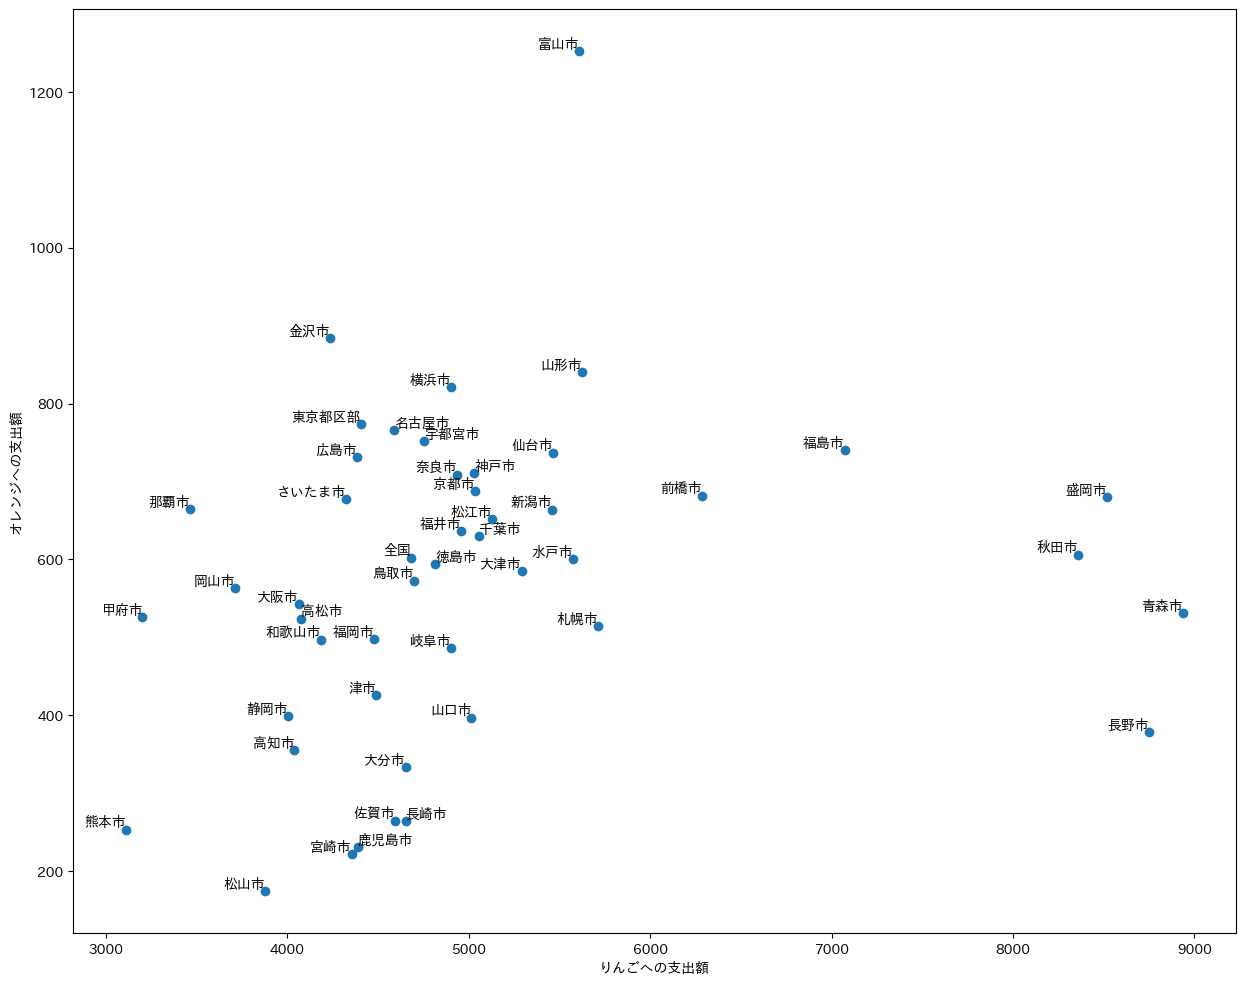

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応（グラフ中で日本語が表示できるようにする）

file_name = "/content/SSDSE-C-2023.csv"
df = pd.read_csv(file_name, header=[0,1], encoding="shift_jis")
# print(df)

# print(df.filter(like='りんご', axis=1))  # ヘッダーに'りんご'を含む列を検索
# print(df.filter(like='オレンジ', axis=1))  # ヘッダーに'オレンジ'を含む列を検索

x = df[('LB061001','りんご')]
y = df[('LB061004','オレンジ')]
city = df[('City','市')]
# print(city)

plt.figure(figsize=(15, 12))
plt.scatter(x,y) # 散布図
for i in range(len(x)): # 各点に市のラベルを付ける
    # 文字が重なってしまう都道府県名の表示位置を調整
    if city[i] in ['神戸市', '千葉市', '徳島市', '長崎市', '鹿児島市', '高松市', '宇都宮市', '名古屋市']:
        plt.text(x[i], y[i], city[i], ha='left', va='bottom')
    else:
        plt.text(x[i], y[i], city[i], ha='right', va='bottom')

plt.xlabel('りんごへの支出額')
plt.ylabel('オレンジへの支出額')
plt.show()

# df_city_ringo_orange = df[[('City','市'),('LB061001','りんご'),('LB061004','オレンジ')]]  # 市の列とりんごの列とオレンジの列を抽出
# print(df_city_ringo_orange)

Index(['世帯人員', '食料（合計）', '01　穀類', '米', '食パン', '他のパン', '生うどん・そば', '乾うどん・そば',
       'パスタ', '中華麺',
       ...
       'すし（外食）', '和食', '中華食', '洋食', '焼肉', 'ハンバーガー', '他の主食的外食', '喫茶代', '飲酒代',
       '学校給食'],
      dtype='object', length=226)
世帯人員


KeyError: 0

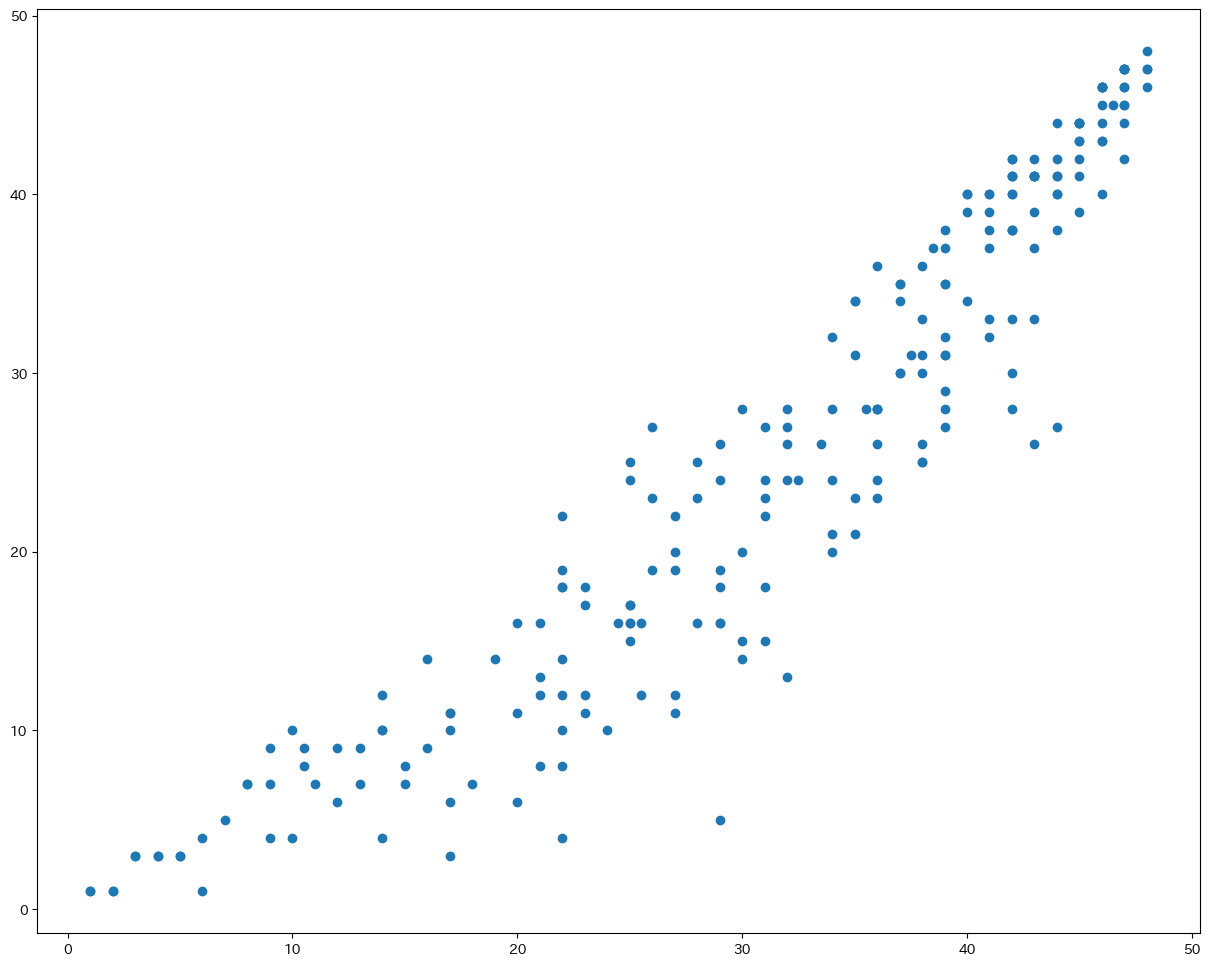

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応（グラフ中で日本語が表示できるようにする）

# print(df_miyazaki_rank.shape)
# print(dfr_miyazaki_rank.shape)

plt.figure(figsize=(15, 12))
x = df_miyazaki_rank.iloc[0, 1:]
y = dfr_miyazaki_rank
plt.scatter(x,y) # 散布図

# ヘッダーの2行目を取得
item = y.columns.get_level_values(1)
print(item)
print(item[0])

for i in range(len(x)): # 各点にアイテムのラベルを付ける
    plt.text(x[i], y[i], item[i], ha='left', va='bottom')
    # 文字が重なってしまう都道府県名の表示位置を調整
    # if city[i] in ['神戸市', '千葉市', '徳島市', '長崎市', '鹿児島市', '高松市', '宇都宮市', '名古屋市']:
    #     plt.text(x[i], y[i], city[i], ha='left', va='bottom')
    # else:
    #     plt.text(x[i], y[i], city[i], ha='right', va='bottom')

plt.xlabel('宮崎市の各アイテムのランキング')
plt.ylabel('宮崎市の各アイテムの割合ランキング')
plt.show()

# 参考
以下は、「データのランキング」のセクション後半で、支出額を割合で上書きするプログラムの作成時に、その動作を小さいDataFrameで確認したときのもの。参考までに掲載します。

なお、本日の小テストはこの（下記の）プログラムに関する問題です。

In [ ]:
import pandas as pd

dfs = pd.DataFrame({'a': [1,2], 'b': [3,4], 'c': [5,6]})
print(dfs)

for column_name, item in dfs.iloc[:,1:3].iteritems():
  dfs[column_name] = dfs[column_name] / dfs['a']
print(dfs)